In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

from sklearn.preprocessing import MinMaxScaler

In [21]:
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")
full_path = os.path.join(path, "AB_NYC_2019.csv")
df = pd.read_csv(full_path)
print("Data loaded succesfully.")


Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Data loaded succesfully.


In [22]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
# Shape of dataset and data types
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("Columns in dataset:")
display(df.dtypes)
print("----------")

#Numerical
print("Summary statistics (numerical):")
display(df.describe())
print("----------")

#Categorical
print("Summary statistics (categorical):")
display(df.describe(exclude=['float64','int64']))
print("----------")

#Check unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
unique_values_dict = {col: df[col].unique() for col in categorical_cols}
unique_values_df = pd.DataFrame({
    "Column": list(unique_values_dict.keys()),
    "Unique Values": [', '.join(map(str, vals)) for vals in unique_values_dict.values()]
})
# Display the table
display(unique_values_df)

Number of rows: 48895, Number of columns: 16
Columns in dataset:


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


----------
Summary statistics (numerical):


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


----------
Summary statistics (categorical):


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


----------


,Column,Unique Values
0,name,"Clean & quiet apt home by the park, Skylit Mid..."
1,host_name,"John, Jennifer, Elisabeth, LisaRoxanne, Laura,..."
2,neighbourhood_group,"Brooklyn, Manhattan, Queens, Staten Island, Bronx"
3,neighbourhood,"Kensington, Midtown, Harlem, Clinton Hill, Eas..."
4,room_type,"Private room, Entire home/apt, Shared room"
5,last_review,"2018-10-19, 2019-05-21, nan, 2019-07-05, 2018-..."


In [24]:
print("Missing values before cleaning:")
print(df.isnull().sum())
print("----------")

df_clean = df.copy()

df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)
df_clean['last_review'] = df_clean['last_review'].fillna("None")
df_clean['name'] = df_clean['name'].fillna("Unknown")

df_clean = df_clean[(df_clean['price'] > 10) & (df_clean['price'] < 500)]

df_clean = df_clean.drop(['id', 'host_name', 'last_review'], axis=1)

print("Missing values after cleaning:")
print(df_clean.isnull().sum())
print(f"Rows remaining: {len(df_clean)}")

df_clean.to_csv("train_cleaned.csv", index=False)

Missing values before cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
----------
Missing values after cleaning:
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                

Histograms of numerical columns:


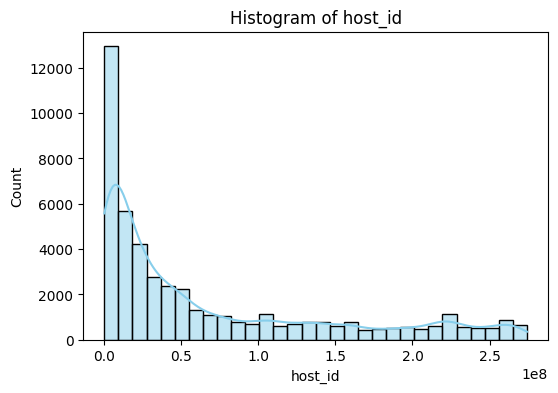

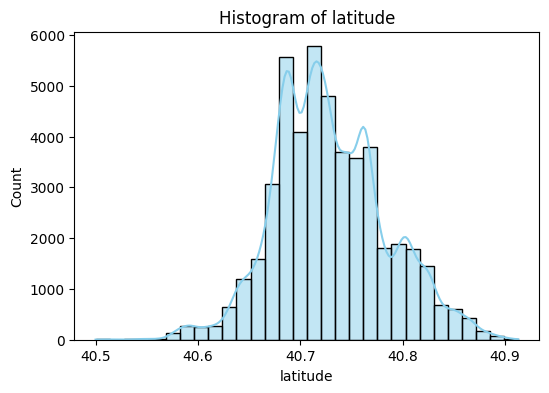

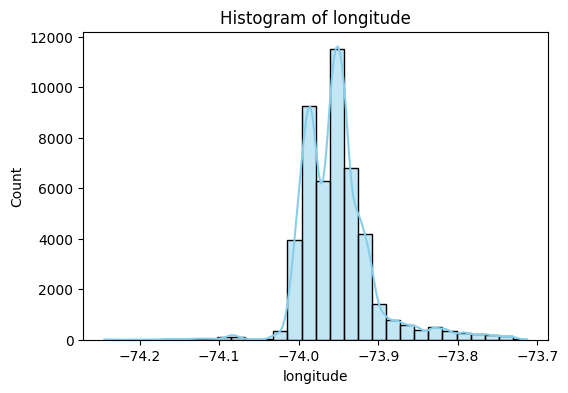

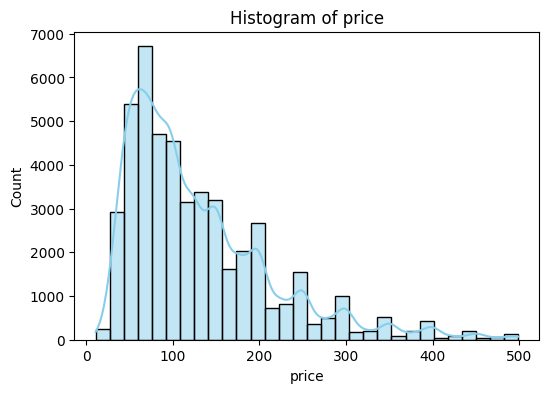

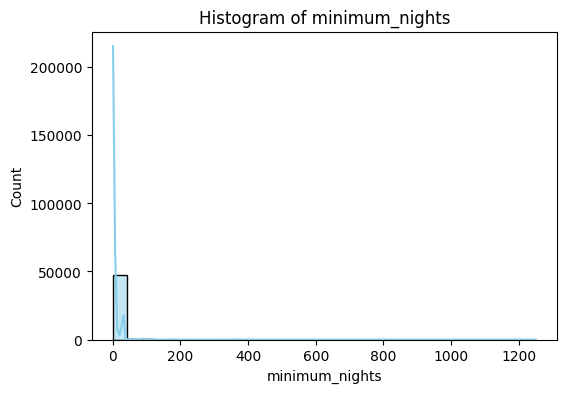

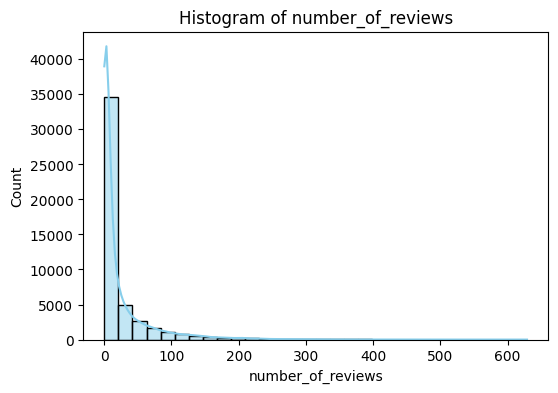

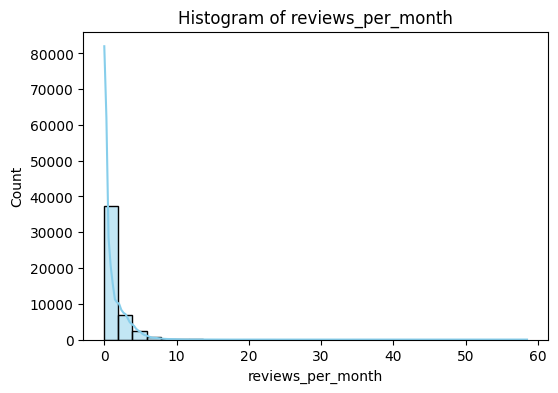

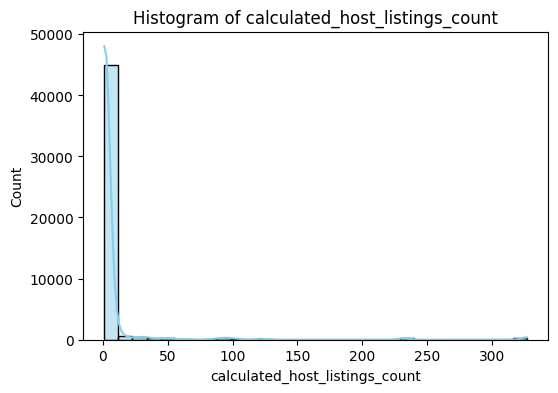

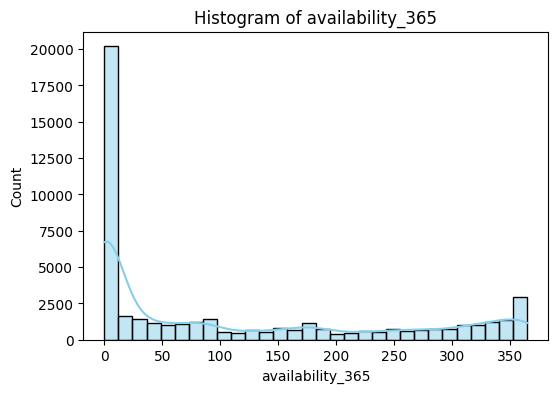

In [25]:
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(exclude=['int64', 'float64']).columns

print("Histograms of numerical columns:")
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

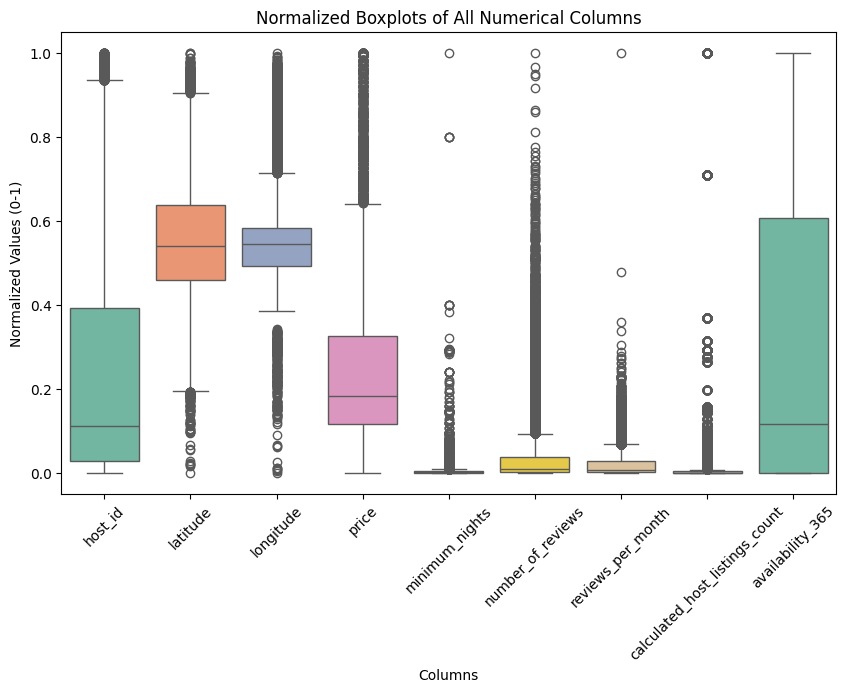

In [26]:
scaler = MinMaxScaler()
df_normalized = df_clean[numerical_cols].copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_normalized, palette="Set2")
plt.title("Normalized Boxplots of All Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Normalized Values (0-1)")
plt.xticks(rotation=45)
plt.show()

# Task
Conduct eda
correlation heatmap
final set to be used

Count plots of categorical columns:


/tmp/ipython-input-3243307863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y=col, palette='viridis')


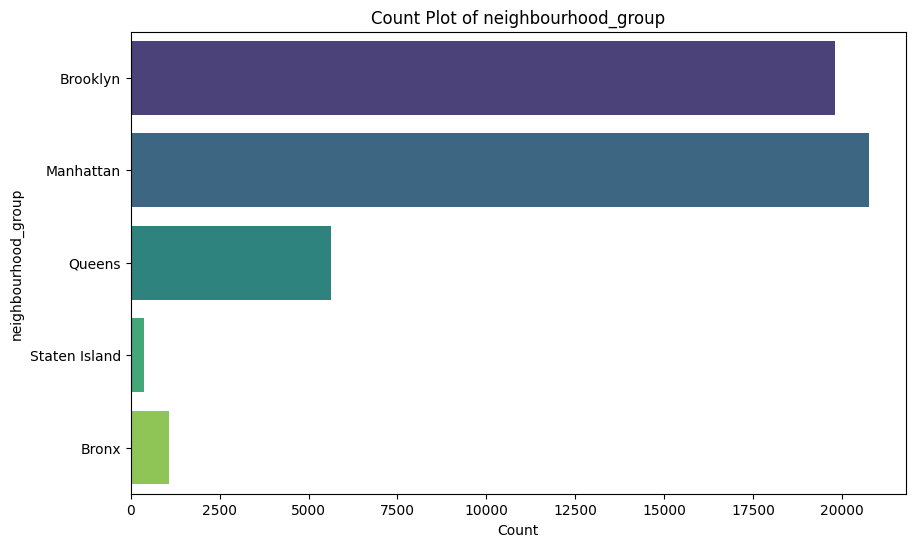

/tmp/ipython-input-3243307863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y=col, palette='viridis')


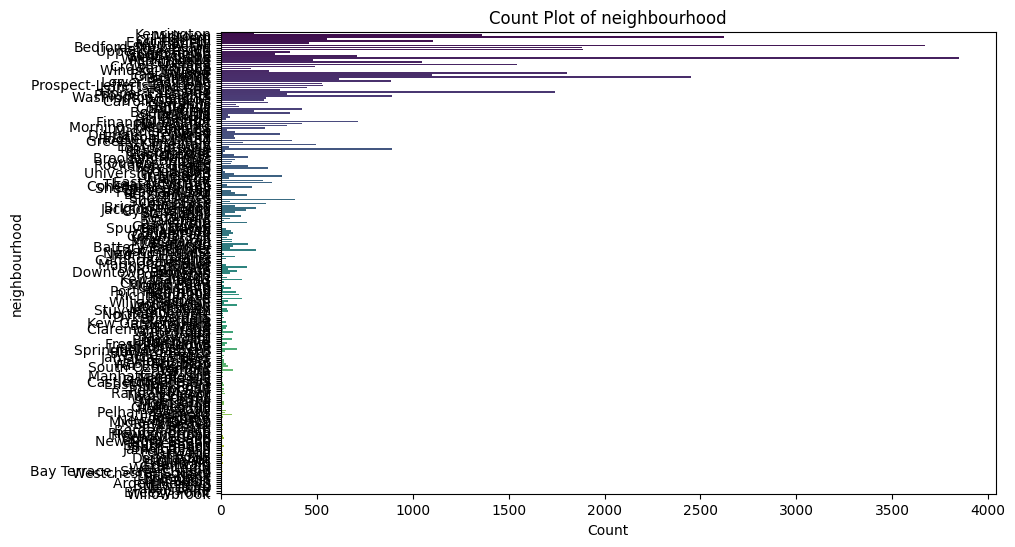

/tmp/ipython-input-3243307863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y=col, palette='viridis')


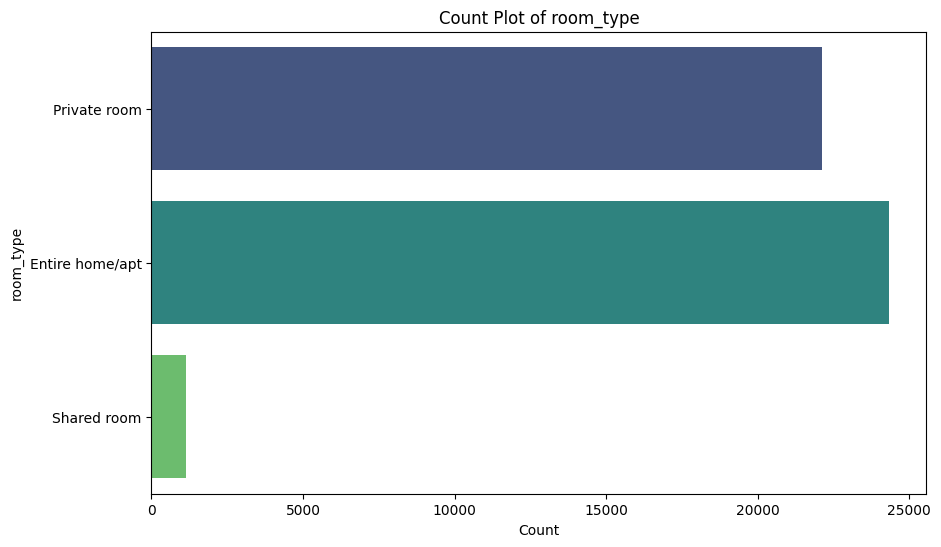

In [27]:
print("Count plots of categorical columns:")
relevant_categorical_cols = [col for col in categorical_cols if col not in ['name', 'host_name', 'last_review']]

for col in relevant_categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clean, y=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

**Reasoning**:
Now that the categorical features have been visualized, the next step is to compute and visualize the correlation matrix for the numerical features to understand their relationships. I will use `df_clean.corr()` to compute the correlation matrix and `seaborn.heatmap()` to visualize it, ensuring the plot is readable.



Correlation matrix of numerical features:


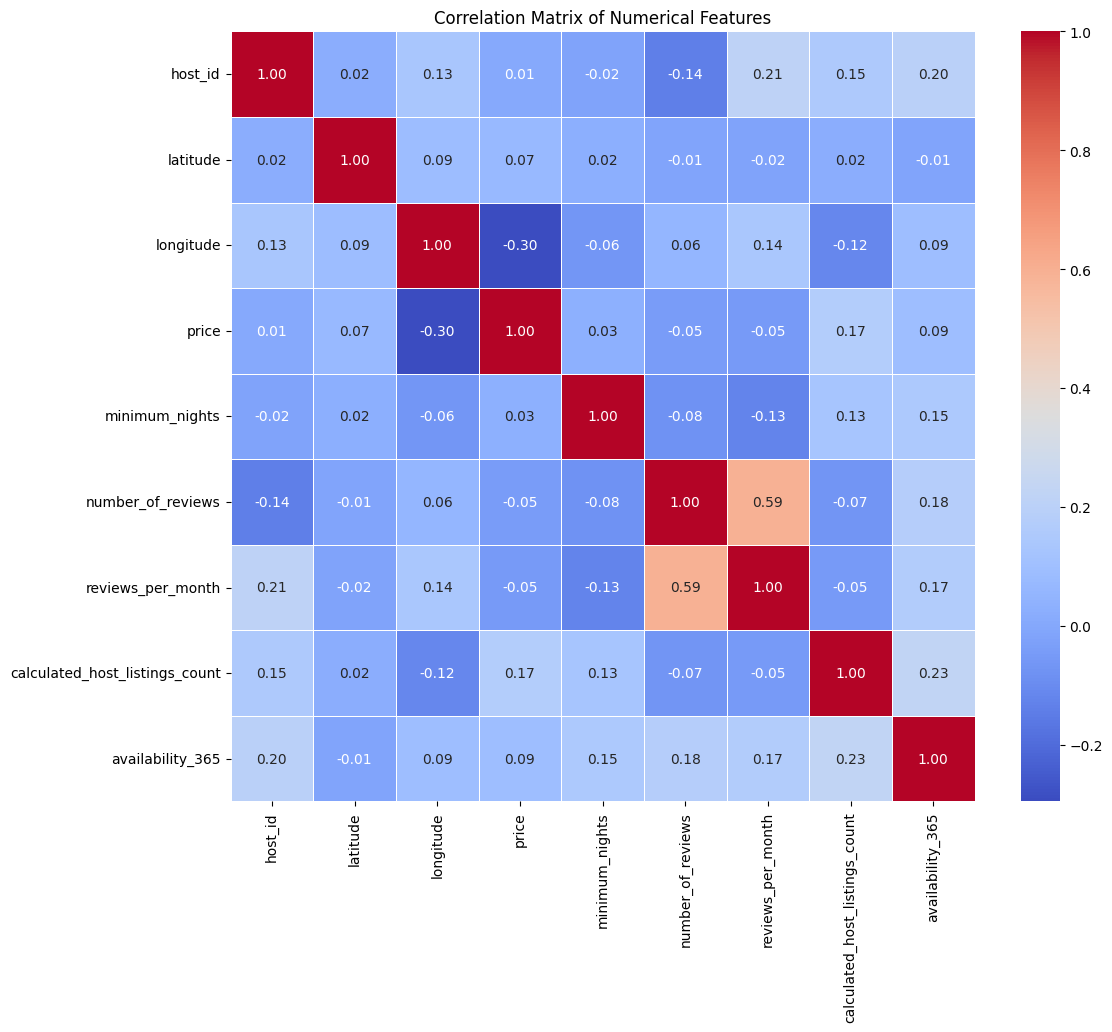

In [28]:
print("Correlation matrix of numerical features:")
correlation_matrix = df_clean[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Box plots of categorical features vs. price:


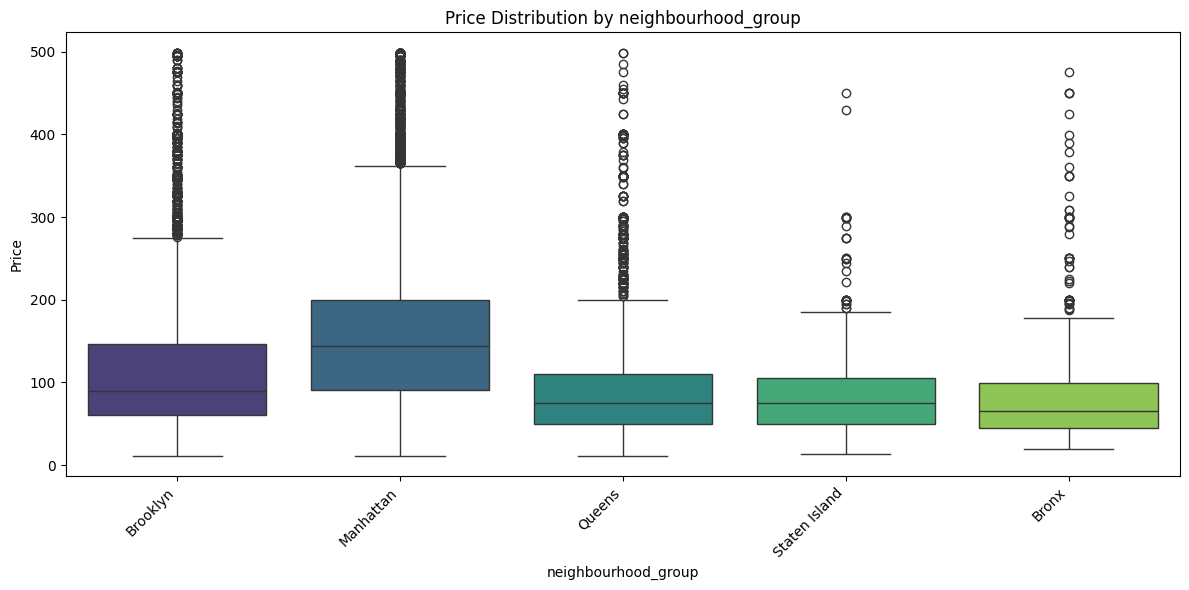

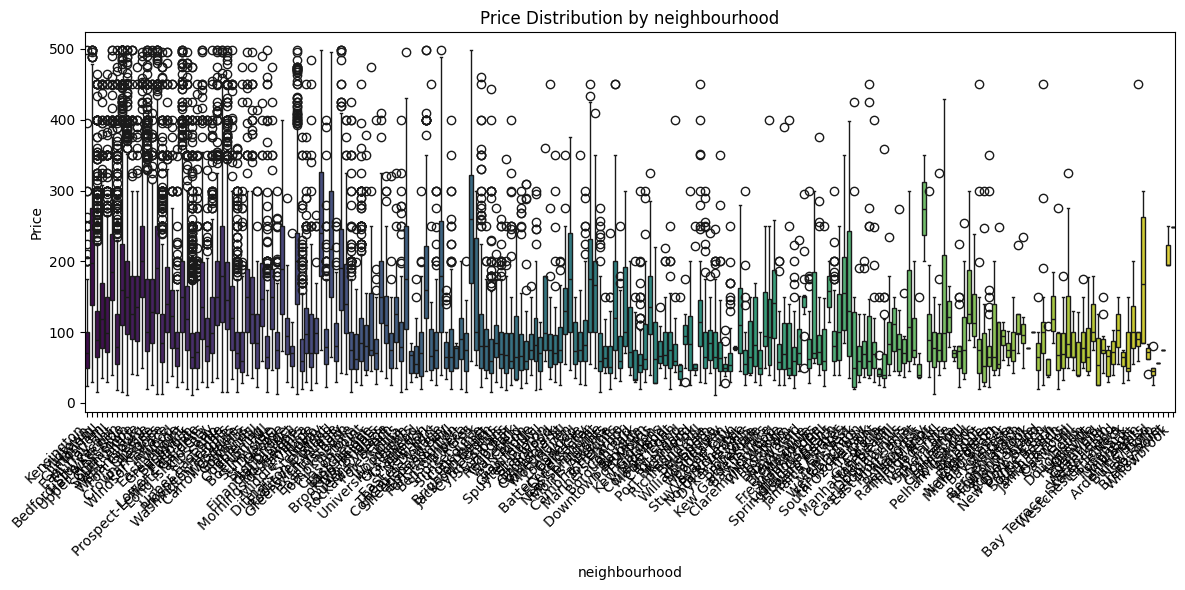

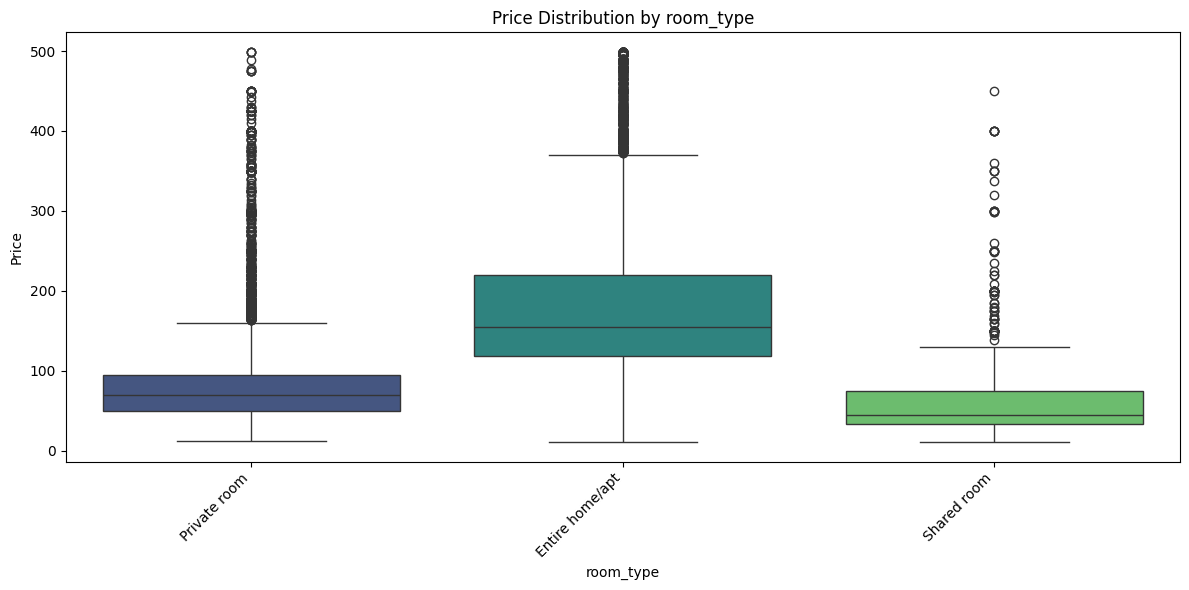

In [29]:
print("Box plots of categorical features vs. price:")
for col in relevant_categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_clean, x=col, y='price', hue=col, palette='viridis', legend=False)
    plt.title(f'Price Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Analyze Numerical Feature Correlations

*   Review the previously generated correlation matrix to identify highly correlated numerical features.
*   Decide which features to keep and which to drop if have to, to avoid multicollinearity in the prediction model.


In [30]:
print("Reviewing correlation matrix for highly correlated features:")

high_corr_threshold = 0.7
features_to_drop = set()
abs_correlation_matrix = correlation_matrix.abs()

#find highly correlated pairs
for i in range(len(abs_correlation_matrix.columns)):
    for j in range(i + 1, len(abs_correlation_matrix.columns)):
        col1 = abs_correlation_matrix.columns[i]
        col2 = abs_correlation_matrix.columns[j]
        correlation_value = abs_correlation_matrix.iloc[i, j]

        if correlation_value > high_corr_threshold:
            print(f"Highly correlated pair: '{col1}' and '{col2}' (Correlation: {correlation_value:.2f})")
            features_to_drop.add(col2)

selected_numerical_features = [col for col in numerical_cols if col not in features_to_drop]

print(f"\nNumerical features initially considered: {list(numerical_cols)}")
print(f"Features identified for dropping due to high correlation: {list(features_to_drop)}")
print(f"Selected numerical features to keep for the model: {selected_numerical_features}")

Reviewing correlation matrix for highly correlated features:

Numerical features initially considered: ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Features identified for dropping due to high correlation: []
Selected numerical features to keep for the model: ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [31]:

df_one_hot = pd.get_dummies(df_clean[relevant_categorical_cols], drop_first=True)

print("Head of the one-hot encoded DataFrame:")
display(df_one_hot.head())

Head of the one-hot encoded DataFrame:


,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
print("Combining selected numerical and one-hot encoded categorical features...")

df_selected_numerical = df_clean[selected_numerical_features]
# Combine
df_final_features = pd.concat([df_selected_numerical, df_one_hot], axis=1)

print("Head of the final feature set DataFrame:")
display(df_final_features.head())

print(f"Shape of the final feature set: {df_final_features.shape}")

Combining selected numerical and one-hot encoded categorical features...
Head of the final feature set DataFrame:


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,True,...,False,False,False,False,False,False,False,False,True,False
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,False,...,False,False,False,False,False,False,False,False,False,False
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365,False,...,False,False,False,False,False,False,False,False,True,False
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194,True,...,False,False,False,False,False,False,False,False,False,False
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,False,...,False,False,False,False,False,False,False,False,False,False


Shape of the final feature set: (47632, 233)


In [33]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = df_final_features.copy()
y_raw = df_clean["price"].copy()

print("X shape:", X.shape)
print("y shape:", y_raw.shape)
display(y_raw.describe())


X shape: (47632, 233)
y shape: (47632,)


,price
count,47632.000000
mean,130.126785
std,85.059476
min,11.000000
25%,68.000000
50%,100.000000
75%,170.000000
max,499.000000


In [34]:
y = np.log1p(y_raw)  # log(1+price) for skewed price distribution
display(y.describe())


,price
count,47632.000000
mean,4.687520
std,0.614381
min,2.484907
25%,4.234107
50%,4.615121
75%,5.141664
max,6.214608


In [35]:
y_binned = pd.qcut(y.rank(method="first"), q=10)  # robust quantile bins

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y_binned
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (33342, 233) Test size: (14290, 233)


In [36]:
import numpy as np

def regression_metrics_logspace(y_true_log, y_pred_log, label="Model"):
    # Log-space metrics
    mae_log = mean_absolute_error(y_true_log, y_pred_log)
    rmse_log = np.sqrt(mean_squared_error(y_true_log, y_pred_log))
    r2_log = r2_score(y_true_log, y_pred_log)

    # Convert back to original price space
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    return {
        "Model": label,
        "MAE (Price)": mae,
        "RMSE (Price)": rmse,
        "R2 (Price)": r2,
        "MAE (log)": mae_log,
        "RMSE (log)": rmse_log,
        "R2 (log)": r2_log
    }


In [37]:
results = []

baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)
results.append(regression_metrics_logspace(y_test, y_pred_base, "Baseline (Mean)"))

pd.DataFrame(results)


,Model,MAE (Price),RMSE (Price),R2 (Price),MAE (log),RMSE (log),R2 (log)
0,Baseline (Mean),62.470783,88.335372,-0.070507,0.507552,0.614002,-0.000002


In [38]:
ridge_model = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),  # safe for one-hot/sparse
    ("model", Ridge(alpha=1.0, random_state=42))
])

rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

gbr_model = GradientBoostingRegressor(
    random_state=42
)

models = [
    ("Ridge Regression", ridge_model),
    ("Random Forest", rf_model),
    ("Gradient Boosting", gbr_model)
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(regression_metrics_logspace(y_test, y_pred, name))

pd.DataFrame(results)


,Model,MAE (Price),RMSE (Price),R2 (Price),MAE (log),RMSE (log),R2 (log)
0,Baseline (Mean),62.470783,88.335372,-0.070507,0.507552,0.614002,-0.000002
1,Ridge Regression,19.133387,48.859073,0.672500,0.130523,0.177888,0.916063
2,Random Forest,0.005148,0.063401,0.999999,0.000029,0.001039,0.999997
3,Gradient Boosting,0.224062,0.563586,0.999956,0.001491,0.003035,0.999976


In [39]:
import pandas as pd
import numpy as np

price_results = []

models_for_eval = [
    ("Baseline", baseline),
    ("Ridge Regression", ridge_model),
    ("Random Forest", rf_model),
    ("Gradient Boosting", gbr_model)
]

for name, model in models_for_eval:
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)

    # back to original price
    y_true_price = np.expm1(y_test)
    y_pred_price = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_true_price, y_pred_price)
    rmse = np.sqrt(mean_squared_error(y_true_price, y_pred_price))
    r2 = r2_score(y_true_price, y_pred_price)

    price_results.append({
        "Model": name,
        "MAE (Price)": mae,
        "RMSE (Price)": rmse,
        "R2 (Price)": r2
    })

results_price_df = pd.DataFrame(price_results).sort_values("RMSE (Price)")
display(results_price_df)


,Model,MAE (Price),RMSE (Price),R2 (Price)
2,Random Forest,0.005148,0.063401,0.999999
3,Gradient Boosting,0.224062,0.563586,0.999956
1,Ridge Regression,19.133387,48.859073,0.672500
0,Baseline,62.470783,88.335372,-0.070507


In [40]:
print(results_price_df)

               Model  MAE (Price)  RMSE (Price)  R2 (Price)
2      Random Forest     0.005148      0.063401    0.999999
3  Gradient Boosting     0.224062      0.563586    0.999956
1   Ridge Regression    19.133387     48.859073    0.672500
0           Baseline    62.470783     88.335372   -0.070507


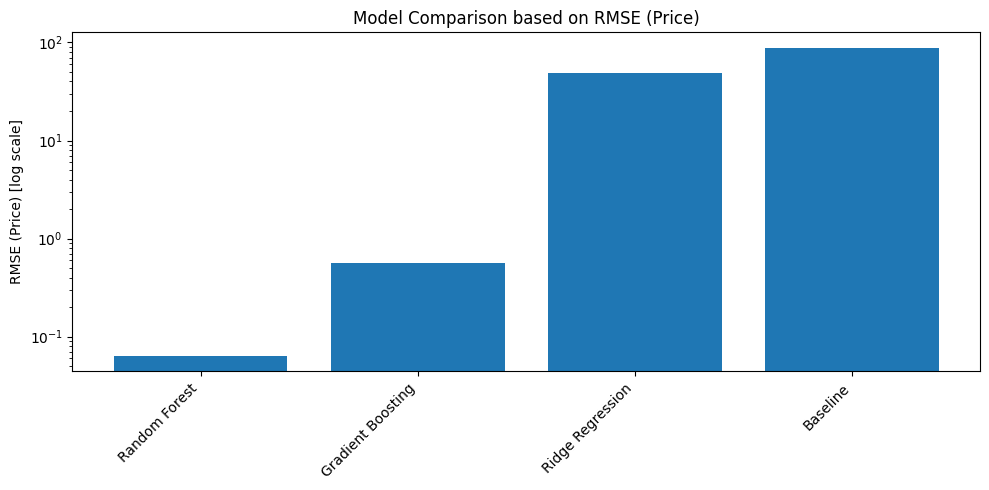

In [42]:
results_price_sorted = results_price_df.sort_values("RMSE (Price)")

plt.figure(figsize=(10,5))
plt.bar(results_price_sorted["Model"], results_price_sorted["RMSE (Price)"])
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE (Price) [log scale]")
plt.title("Model Comparison based on RMSE (Price)")
plt.tight_layout()
plt.show()

In [43]:
best_model_name = "Random Forest"
best_model = rf_model


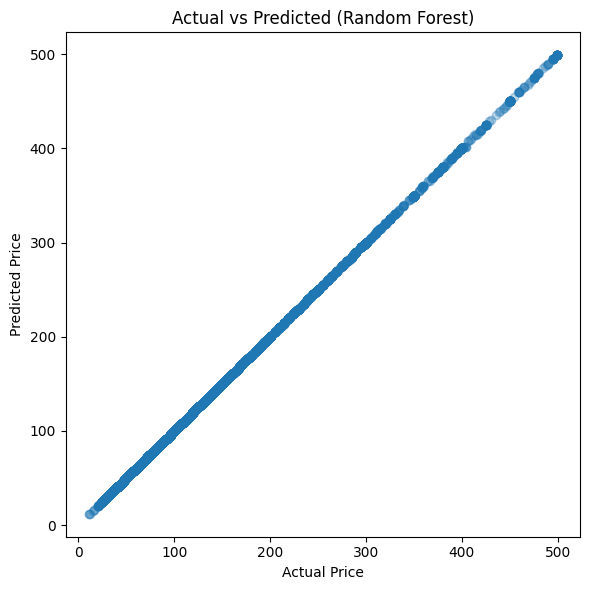

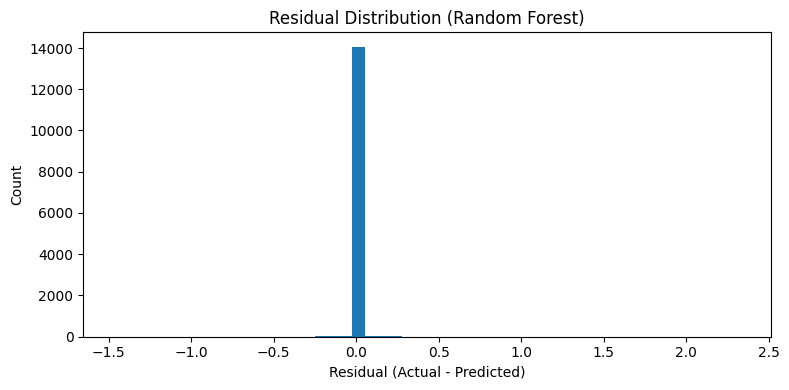

In [44]:
best_model = rf_model
best_model.fit(X_train, y_train)

y_pred_log = best_model.predict(X_test)
y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(y_pred_log)
residuals = y_test_price - y_pred_price

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_price, y_pred_price, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Random Forest)")
plt.tight_layout()
plt.show()

# Residual distribution
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=50)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Residual Distribution (Random Forest)")
plt.tight_layout()
plt.show()


In [46]:
print(results_price_df)
# columns: ['Model', 'MAE (Price)', 'RMSE (Price)', 'R2 (Price)', ...]

               Model  MAE (Price)  RMSE (Price)  R2 (Price)
2      Random Forest     0.005148      0.063401    0.999999
3  Gradient Boosting     0.224062      0.563586    0.999956
1   Ridge Regression    19.133387     48.859073    0.672500
0           Baseline    62.470783     88.335372   -0.070507


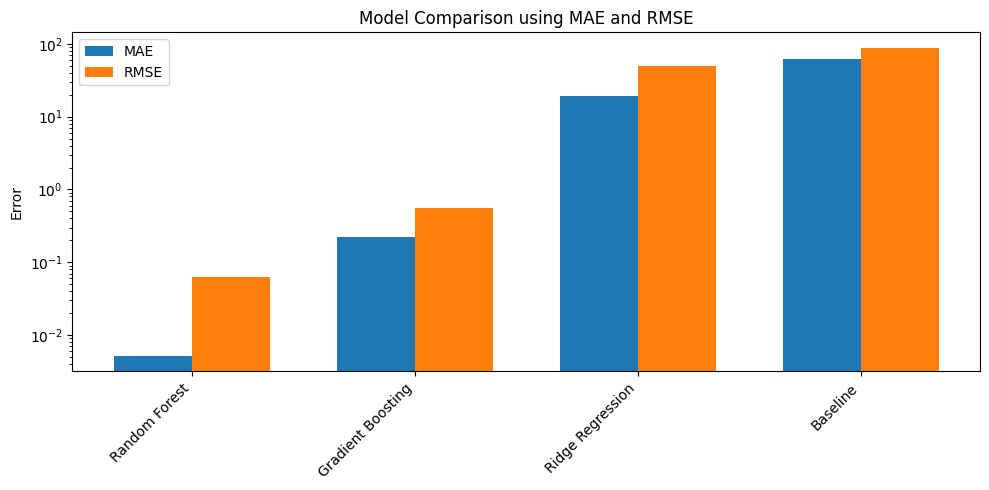

In [48]:
import numpy as np
import matplotlib.pyplot as plt

results_df_sorted = results_price_df.sort_values("RMSE (Price)")

x = np.arange(len(results_df_sorted))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, results_df_sorted["MAE (Price)"], width, label="MAE")
plt.bar(x + width/2, results_df_sorted["RMSE (Price)"], width, label="RMSE")

plt.xticks(x, results_df_sorted["Model"], rotation=45, ha="right")
plt.ylabel("Error")
plt.title("Model Comparison using MAE and RMSE")
plt.legend()
plt.yscale("log")
plt.tight_layout()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib

print("Starting Model Training...")

le_neigh = LabelEncoder()
le_room = LabelEncoder()

df['neigh_encoded'] = le_neigh.fit_transform(df['neighbourhood_group'])
df['room_encoded'] = le_room.fit_transform(df['room_type'])

X = df[['neigh_encoded', 'latitude', 'longitude', 'room_encoded', 'minimum_nights', 'availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"Model Accuracy (R2): {score:.2f}")

joblib.dump(model, 'airbnb_price_model.pkl')
joblib.dump(le_neigh, 'le_neighborhood.pkl')
joblib.dump(le_room, 'le_room_type.pkl')


Starting Model Training...
Model Accuracy (R2): 0.15


['le_room_type.pkl']